# Project 2 Visualizations
*CS 4670, Spring 2019*


The purpose of this notebook is to help you gain a better understanding of your hard work. Treat this as an intermediate step between each part of the assignment. This notebook will walk through parts A, B and C and render any images/filters as necessary. You should compare your results to those provided in the writeup. 

In [1]:
import texture_gradient as code
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import cv2

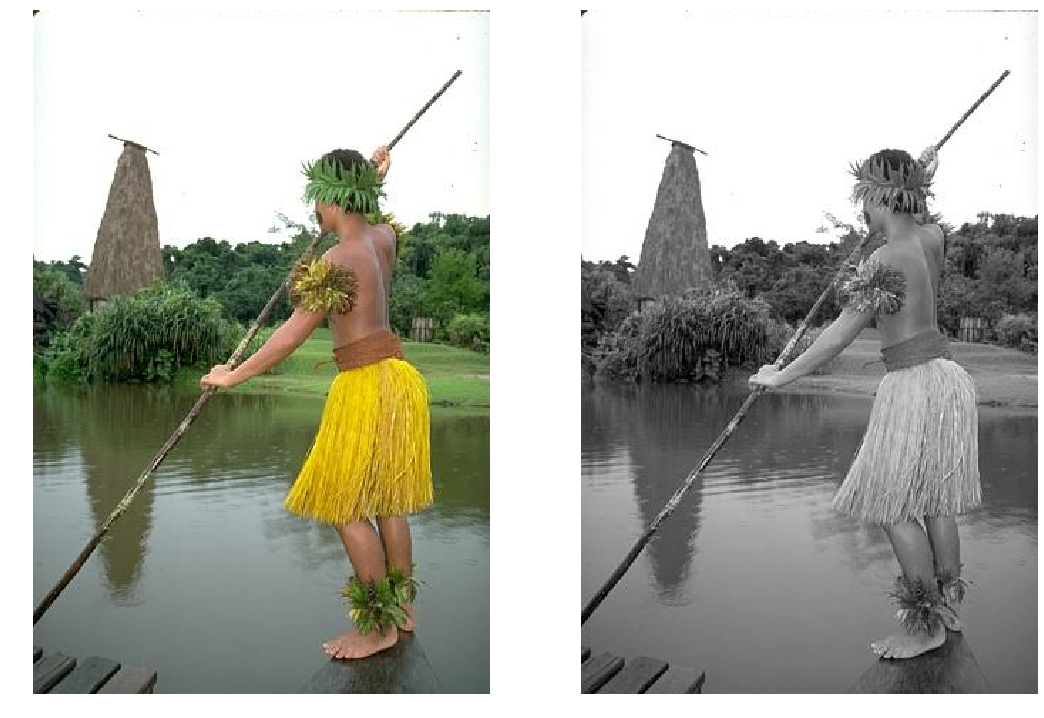

In [2]:
image = plt.imread("./101087.jpg")
gray = cv2.imread("./101087.jpg", cv2.IMREAD_GRAYSCALE)
# Plot
fig = plt.figure(figsize=(18, 16))
axis1 = fig.add_subplot(1,2,1)
plt.axis('off')
axis1.imshow(image)
axis2 = fig.add_subplot(1,2,2)
plt.axis('off')
axis2.imshow(gray, cmap='gray')

## Part A: Image Processing 

Let's take the X and Y gradients of the image and combine them with the gradient magnitude function.

In [ ]:
xGrayGrad = code.takeXGradient(gray)
yGrayGrad = code.takeYGradient(gray)
mGrayGrad = code.takeGradientMag(gray)
# Plot
fig = plt.figure(figsize=(18, 16))
axis1 = fig.add_subplot(1,3,1)
plt.axis('off')
axis1.imshow(code.getDisplayGradient(xGrayGrad), cmap='gray')
axis2 = fig.add_subplot(1,3,2)
plt.axis('off')
axis2.imshow(code.getDisplayGradient(yGrayGrad), cmap='gray')
axis3 = fig.add_subplot(1,3,3)
plt.axis('off')
axis3.imshow(code.getDisplayGradient(mGrayGrad), cmap='gray')

In [ ]:
xRGBGrad = code.takeXGradient(image)
yRGBGrad = code.takeYGradient(image)
mRGBGrad = code.takeGradientMag(image)
# Plot
fig = plt.figure(figsize=(18, 16))
axis1 = fig.add_subplot(1,3,1)
plt.axis('off')
axis1.imshow(code.getDisplayGradient(xRGBGrad))
axis2 = fig.add_subplot(1,3,2)
plt.axis('off')
axis2.imshow(code.getDisplayGradient(yRGBGrad))
axis3 = fig.add_subplot(1,3,3)
plt.axis('off')
axis3.imshow(code.getDisplayGradient(mRGBGrad))

## Part B: k-Means Segmentation

In [ ]:
segments = 10
segmented = code.segmentKmeans(image, segments)
plt.axis('off')
plt.imshow(segmented)

Notice how the sky (which is a uniform object) has been segmented into multiple pieces.This is due to our choice of 10 segments. When performing segmentation, it is best to choose a higher number of segments than the number of objects in the image. This will ensure that all objects of interest are properly segmented by the algorithm. Over-segmented objects are merged later in post-processing.

## Part C: Texture Based Edge Detection

First let's get the Gaussian oriented filter.

In [ ]:
gaussian = code.getOrientedFilter(code.getGaussian,0)
plt.axis('off')
plt.imshow(gaussian, cmap='gray')

Next, let's get the filter bank.

In [ ]:
filter_bank = code.getFilterBank()
print(len(filter_bank))
fig = plt.figure(figsize=(18, 16))
# Odd-symmetric gaussian derivative filters
filter_index = 1
for i in range(1, 16, 2):
    axis = fig.add_subplot(1,17,filter_index)
    plt.axis('off')
    plt.imshow(filter_bank[i], cmap='gray')
    filter_index += 1
# Even-symmetric gaussian derivative filters
for i in range(0, 17, 2):
    axis = fig.add_subplot(1,17,filter_index)
    plt.axis('off')
    plt.imshow(filter_bank[i], cmap='gray')
    filter_index += 1
# Center-surround filter
plt.axis('off')
plt.imshow(filter_bank[16], cmap='gray')

Each channel of the color image will first be smoothed with the gaussian oriented filter, then convolved with each filter in the filter bank. 

In [ ]:
# This may take a while
labels, features = code.getTextons(image, vocab_size=32)
labels.shape

Here, the $3^{rd}$ dimension represents the one-hot encoding of the texton id. Also, note that we chose the number of textons to be 32 because the paper says it is sufficient.

Finally, we will compute differences of histograms in oriented-half disks on this 32-dim image. 

In [ ]:
# This may take a while
G = code.computeTextureGradient(image, vocab_size=32)

Now we will display each channel of G.

Channel 1 ($\theta = 0$): You should see horizontal activations, i.e., horizontal contours should be lit up.

Channel 2 ($\theta = \pi/4$): You should see contours at a $45^{\circ}$ lit up.

Channel 3 ($\theta = \pi/2$): You should see vertical activations.

Channel 4 ($\theta = \pi$): This is the texture channel

In [ ]:
fig = plt.figure(figsize=(18, 16))
axis1 = fig.add_subplot(1,4,1)
plt.axis('off')
axis1.imshow(G[:,:,0])
axis2 = fig.add_subplot(1,4,2)
plt.axis('off')
axis2.imshow(G[:,:,1])
axis3 = fig.add_subplot(1,4,3)
plt.axis('off')
axis3.imshow(G[:,:,2])
axis4 = fig.add_subplot(1,4,4)
plt.axis('off')
axis4.imshow(G[:,:,3])

Combined contour detection:

In [ ]:
contours = (G - np.min(G))/np.ptp(G) # Normalize [0,1]
plt.axis('off')
plt.imshow(contours)

## Le fin

If you are interesting in learning about where this came from, check out this [paper](https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/papers/amfm_pami2010.pdf).